# Demo Workflow: Working with SlideRunner Databases

In [1]:
from SlideRunner.dataAccess.database import Database
import SlideRunner.dataAccess.database

### Open Demo database

In [2]:
DB = Database().open('/Users/artemiorimando/PycharmProjects/samsung-capstone/databases/MITOS_WSI_CMC_CODAEL_TR_ROI.sqlite')

In [3]:
slideid = DB.findSlideWithFilename('2d56d1902ca533a5b509.svs','')
DB.loadIntoMemory(slideid)

In [4]:
for anno in DB.annotations.keys():
    print(anno,':',DB.annotations[anno])

1437 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e26075e0>
1438 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e2607070>
1439 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e2607490>
1440 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e26072e0>
1441 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e26073d0>
1442 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7b0587d60>
1443 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e2628460>
1444 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e26286a0>
1445 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e2628280>
1446 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e26281f0>
1447 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e2628160>
1448 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fa7e2

In [5]:
DB.annotations.keys()

dict_keys([1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1596, 1597, 1599, 1600, 1601, 1602, 1603, 1604, 1605,

## Let's first assess the polygon (ID 1437)

In [6]:
DB.annotations[1437].coordinates

array([[26895,  4861],
       [26945,  4911]])

This is the agreed class by all experts:

In [7]:
DB.annotations[1437].agreedClass

2

## For circle annotations we can query the center coordinates and the radius

In [8]:
DB.annotations[1437].x1, DB.annotations[1437].y1, DB.annotations[1437].r

(26920, 4886, 25)

Each object also provides a human readable description:

In [9]:
DB.annotations[1437].getDescription(DB)

[['Position', 'x1=26920, y1=4886'],
 ['Anno 1', 'Mitotic figure (Christof)'],
 ['Anno 2', 'Mitotic figure (Robert)'],
 ['Anno 3', 'Mitotic figure (Christof and Robert)'],
 ['Agreed Class', 'Mitotic figure']]

In [10]:
DB.annotations[1647].getDescription(DB)

[['Position', 'x1=19694, y1=56818'],
 ['Anno 1', 'Mitotic figure (Christof)'],
 ['Anno 2', 'Mitotic figure (Robert)'],
 ['Anno 3', 'Mitotic figure (Christof and Robert)'],
 ['Agreed Class', 'Mitotic figure']]

# Drawing 

In [11]:
import openslide
slide = openslide.open_slide('/Users/artemiorimando/PycharmProjects/samsung-capstone/WSI/2d56d1902ca533a5b509.svs')

In [27]:
import matplotlib.pyplot as plt
import numpy as np
lu = (19000,56000)
img = np.array(slide.read_region( lu, 0, [1000,1000]))[:,:,0:4]

The original image

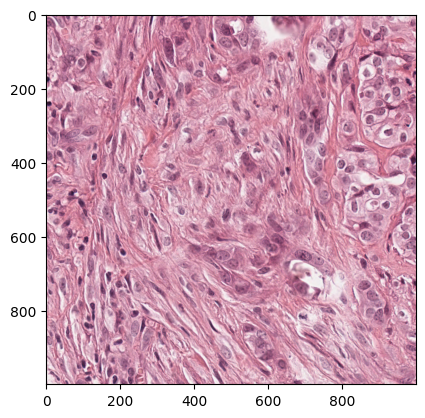

In [28]:
plt.imshow(img)

Now, let's add the circle annotation as an example

In [29]:
from SlideRunner.dataAccess.annotations import ViewingProfile
DB.annotations[1647].draw(image=img, leftUpper=lu, zoomLevel=1., thickness=5, vp=ViewingProfile())

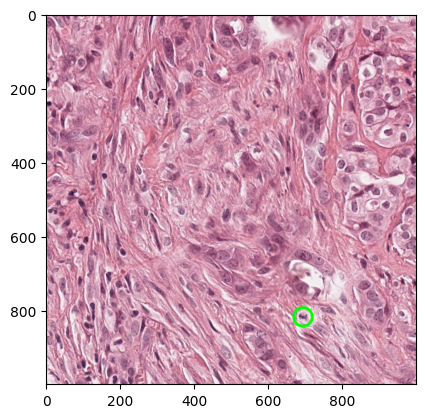

In [30]:
plt.imshow(img)

In [31]:
img

array([[[192, 138, 166, 255],
        [199, 141, 171, 255],
        [205, 142, 174, 255],
        ...,
        [226, 198, 209, 255],
        [223, 193, 207, 255],
        [221, 190, 206, 255]],

       [[203, 138, 165, 255],
        [202, 136, 165, 255],
        [200, 134, 165, 255],
        ...,
        [240, 212, 224, 255],
        [237, 207, 220, 255],
        [233, 201, 215, 255]],

       [[213, 137, 165, 255],
        [205, 132, 161, 255],
        [196, 127, 158, 255],
        ...,
        [252, 224, 238, 255],
        [250, 219, 233, 255],
        [246, 213, 225, 255]],

       ...,

       [[210, 157, 187, 255],
        [206, 157, 182, 255],
        [204, 160, 179, 255],
        ...,
        [241, 186, 209, 255],
        [232, 177, 203, 255],
        [226, 165, 198, 255]],

       [[231, 166, 202, 255],
        [223, 161, 189, 255],
        [211, 156, 176, 255],
        ...,
        [249, 197, 212, 255],
        [243, 192, 209, 255],
        [249, 189, 212, 255]],

       [[220